Project Title: **New York City Taxi Trip Duration Prediction**
<br> Student Id: **0241521**
<br>Student Name: **RAMYA SRI SANKARASETTI**

# Step 0: Business Problem

### Introduction
The New York City Taxi Trip Duration dataset is used to predict the trip duration.
In this I will use Python programming language, Data Visualization libraries such as matplotlib and seaborn, and different SKLearn ML algorithm to to explore data, visulaze data and make prediction. 


### File descriptions
NYC Taxi Trip Duration dataset has following files:
- train.csv - the training set (contains 1458644 trip records)
- test.csv - the testing set (contains 625134 trip records)
- sample_submission.csv - a sample submission file in the correct format

Data Source: https://www.kaggle.com/c/nyc-taxi-trip-duration/data

### Data fields
**Independent Variables**
- id — a unique identifier for each trip
- vendor_id — a code indicating the provider associated with the trip record
- pickup_datetime — date and time when the meter was engaged
- dropoff_datetime — date and time when the meter was disengaged
- passenger_count — the number of passengers in the vehicle (driver entered value)
- pickup_longitude — the longitude where the meter was engaged
- pickup_latitude — the latitude where the meter was engaged
- dropoff_longitude — the longitude where the meter was disengaged
- dropoff_latitude — the latitude where the meter was disengaged
- store_and_fwd_flag — This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server — Y=store and forward; N=not a store and forward trip.
 

**Target Variable**
- trip_duration — duration of the trip in seconds



### Objective of The Project
The goal of this project is to predict the duration of taxi rides in NYC based on features like trip coordinates or pickup date and time. I will start this by loading the dataset using pandas and perform exploratory data analysis (EDA) by checking missing values, doing feature engineering, checking outliers and comparing between univariate and bivariate features,improving the model using ML Algorithms(Decision Tree and Gradient Boosting) as regression model. 
I will also also implement Haversine Formula for calculating the duration between two points(longitude and latitude) as follows

 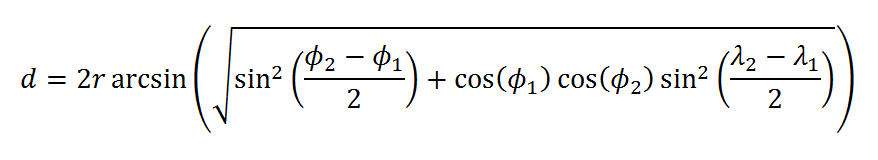
 

where  r  is the Earth's radius, ϕ=latitude;       λ=longitude

**Objectives**
1. What would be the next year busiest day in 2021?
2. Predict the number of trips per hour on daily basis and explanations about the change.
3. Predict the effect of customer location (pickup/drop-off) on the duration of taxi trip duration.

# Import common libraries

In [1]:
import pandas as pd       #data processing
import numpy as np        #linear algebra

In [2]:
#data visualisation
import matplotlib.pyplot as plt
import seaborn as sns     
%matplotlib inline

In [3]:
import datetime as datetime
import math

In [4]:
import warnings; warnings.simplefilter('ignore') # to disable Python warnings


# Import Dataset

In [5]:
nyc_train = pd.read_csv("NYC_Taxi Dataset/train.csv")
nyc_test = pd.read_csv("NYC_Taxi Dataset/test.csv")

# Data Exploration

In [6]:
nyc_train.shape


(1048575, 11)

The shape of the dataset is (1048575, 11) which means that there are 729322 rows and 11 columns in the dataset.


In [7]:
# Let's look at how does the data in these columns look like.
nyc_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,14-03-16 17:24,14-03-16 17:32,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,12-06-16 0:43,12-06-16 0:54,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,19-01-16 11:35,19-01-16 12:10,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,06-04-16 19:32,06-04-16 19:39,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,26-03-16 13:30,26-03-16 13:38,1,-73.973053,40.793209,-73.972923,40.782520,N,435


First 5 rows of the dataset


In [8]:
# check data usage
print('Memory usage, Mb: {:.2f}\n'.format(nyc_train.memory_usage().sum()/2**20))

# Let's check the detailed information about dataset
print('---------------- DataFrame Info -----------------')
print(nyc_train.info())


# Let’s see what are those 11 columns.
#list(nyc_train)
#nyc_train.columns.values
#nyc_train.columns

# Let's look at the datatypes of all these columns.
# nyc_train.dtypes

Memory usage, Mb: 88.00

---------------- DataFrame Info -----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1048575 non-null  object 
 1   vendor_id           1048575 non-null  int64  
 2   pickup_datetime     1048575 non-null  object 
 3   dropoff_datetime    1048575 non-null  object 
 4   passenger_count     1048575 non-null  int64  
 5   pickup_longitude    1048575 non-null  float64
 6   pickup_latitude     1048575 non-null  float64
 7   dropoff_longitude   1048575 non-null  float64
 8   dropoff_latitude    1048575 non-null  float64
 9   store_and_fwd_flag  1048575 non-null  object 
 10  trip_duration       1048575 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 88.0+ MB
None


- it shows that *id, pickup_datetime, dropoff_datetime,* and *store_and_fwd_flag* of the type **object**.
- *vendor_id, passenger_count,* and *trip_duration* are of type **int**.
- *pickup_longitude, pickup_latitude, dropoff_longitude,* and *dropoff_latitude* are of type **float**


**Check for N/A values**

In [9]:
# Check for N/A values
# Let's see if there are any null values in our dataset. 
print(nyc_train.isnull().sum())

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64


**Check for unique values**

In [10]:
# Let's check for unique values of all columns.
nyc_train.nunique()

id                    1048575
vendor_id                   2
pickup_datetime        237127
dropoff_datetime       237442
passenger_count            10
pickup_longitude        21382
pickup_latitude         42587
dropoff_longitude       30924
dropoff_latitude        58292
store_and_fwd_flag          2
trip_duration            6883
dtype: int64

- It shows that id has 1048575 unique values which are equal to the number of rows in our dataset.
- There are 2 unique vendor ids.
- There are  unique passenger counts.
- There are 2 unique values for store_and_fwd_flag, that we also saw in the description of the variables, which are Y and N.

**Sattistical Summary** Let's finally check for a statistical summary of NYC Taxi Trip Duration dataset.

In [11]:
nyc_train.describe()

#nyc_train['trip_duration'].describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.534503e+00,1.664382e+00,-7.397342e+01,4.075094e+01,-7.397336e+01,4.075183e+01,9.621448e+02
std,4.988084e-01,1.314261e+00,4.280165e-02,3.381389e-02,4.274282e-02,3.645002e-02,5.853002e+03
min,1.000000e+00,0.000000e+00,-7.854740e+01,3.435970e+01,-7.981798e+01,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399186e+01,4.073738e+01,-7.399131e+01,4.073594e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075415e+01,-7.397973e+01,4.075455e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396731e+01,4.076836e+01,-7.396301e+01,4.076984e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.391176e+01,3.526282e+06


**Check for Outliers**

In [12]:
print('----------------distance Outliers-------------------')
print('Latitude : {} to {}'.format(
    max(nyc_train.pickup_latitude.min(), nyc_train.dropoff_latitude.min()),
    max(nyc_train.pickup_latitude.max(), nyc_train.dropoff_latitude.max())
))
print('Longitude : {} to {}'.format(
    max(nyc_train.pickup_longitude.min(), nyc_train.dropoff_longitude.min()),
    max(nyc_train.pickup_longitude.max(), nyc_train.dropoff_longitude.max())
))
print('')
print('------------------Time Outliers---------------------')
print('Trip duration in seconds: {} to {}'.format(nyc_train.trip_duration.min(), 
                                                  nyc_train.trip_duration.max()))

print('')
print('------------------Date Outliers---------------------')
print('Datetime range: {} to {}'.format(nyc_train.pickup_datetime.min(), 
                                        nyc_train.dropoff_datetime.max()))
print('')
print('----------------Passengers Outliers------------------')
print('Passengers: {} to {}'.format(nyc_train.passenger_count.min(), 
                                    nyc_train.passenger_count.max()))

----------------distance Outliers-------------------
Latitude : 34.35969543 to 51.88108444
Longitude : -78.54740143 to -61.33552933

------------------Time Outliers---------------------
Trip duration in seconds: 1 to 3526282

------------------Date Outliers---------------------
Datetime range: 01-01-16 0:00 to 31-05-16 9:59

----------------Passengers Outliers------------------
Passengers: 0 to 9


**Check duplicates values**

In [13]:
print('duplicates IDs: {}'.format(len(nyc_train) - len(nyc_train.drop_duplicates(subset='id'))))

duplicates IDs: 0


**Use Haversine distance to calculate latitude and longitude distance**

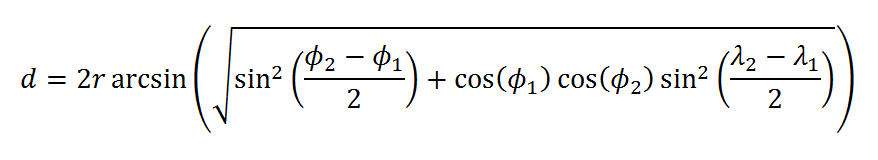 
where  r  is the Earth's radius, ϕ=latitude;       λ=longitude

In [14]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371800  # Earth radius in meters  
    phi1, phi2 = math.radians(lat1), math.radians(lat2) 
    dphi       = math.radians(lat2 - lat1)
    dlambda    = math.radians(lon2 - lon1)
    
    a = math.sin(dphi/2)**2 + \
        math.cos(phi1)*math.cos(phi2)*math.sin(dlambda/2)**2
    
    return 2*R*math.atan2(math.sqrt(a), math.sqrt(1 - a))

In [15]:
nyc_train['distance'] = nyc_train.apply(lambda row: 
                                      haversine(row['pickup_latitude'], 
                                                row['pickup_longitude'], 
                                                row['dropoff_latitude'], 
                                                row['dropoff_longitude']), axis=1)
nyc_test['distance']  = nyc_test.apply(lambda row: 
                                     haversine(row['pickup_latitude'], 
                                               row['pickup_longitude'], 
                                               row['dropoff_latitude'], 
                                               row['dropoff_longitude']), axis=1)

In [16]:
nyc_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance
0,id2875421,2,14-03-16 17:24,14-03-16 17:32,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1498.709112
1,id2377394,1,12-06-16 0:43,12-06-16 0:54,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1805.734277
2,id3858529,2,19-01-16 11:35,19-01-16 12:10,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6385.900354
3,id3504673,2,06-04-16 19:32,06-04-16 19:39,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1485.685215
4,id2181028,2,26-03-16 13:30,26-03-16 13:38,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1188.738628


<AxesSubplot:xlabel='distance', ylabel='Density'>

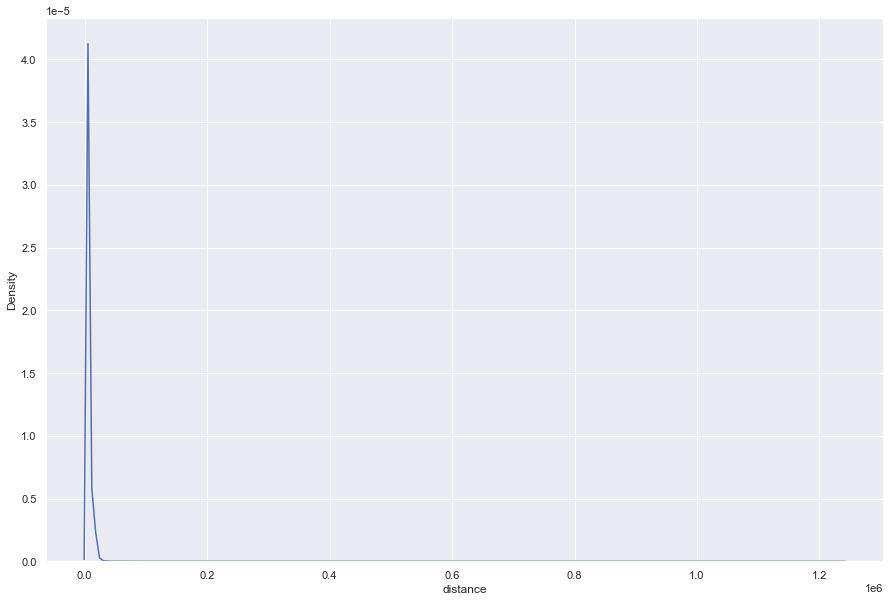

In [17]:
sns.set(rc={'figure.figsize':(15,10)})
sns.distplot(nyc_train['distance'],hist=False)

# Data Preprocessing

Text(0.5, 0, 'Trip Duration')

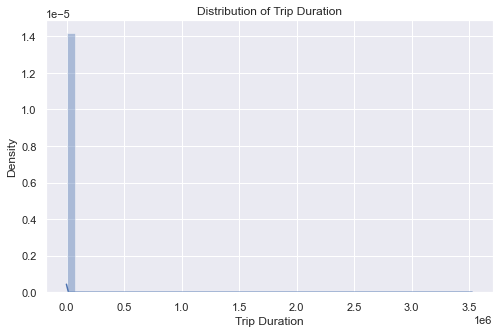

In [18]:
plt.figure(figsize=(8,5))
sns.distplot(nyc_train['trip_duration']).set_title("Distribution of Trip Duration")
plt.xlabel("Trip Duration")

If the label is of a numeric type: converted to a normal distribution, there will be a precision gain

In [19]:
nyc_train['trip_duration'] = np.log(nyc_train['trip_duration'].values)

Text(0.5, 0, 'Trip Duration')

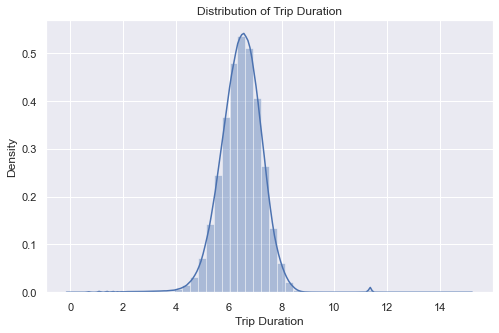

In [20]:
plt.figure(figsize=(8,5))
sns.distplot(nyc_train['trip_duration']).set_title("Distribution of Trip Duration")
plt.xlabel("Trip Duration")

**Extract the date**

In [21]:
#nyc_train['pickup_datetime'] = pd.to_datetime(nyc_train['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
#nyc_test['pickup_datetime'] = pd.to_datetime(nyc_test['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')

nyc_train['pickup_datetime'] = pd.to_datetime(nyc_train['pickup_datetime'])
nyc_test['pickup_datetime'] = pd.to_datetime(nyc_test['pickup_datetime'])

In [22]:
nyc_train['hour'] = nyc_train.loc[:,'pickup_datetime'].dt.hour;
nyc_train['week'] = nyc_train.loc[:,'pickup_datetime'].dt.week;
nyc_train['weekday'] = nyc_train.loc[:,'pickup_datetime'].dt.weekday;
nyc_train['hour'] = nyc_train.loc[:,'pickup_datetime'].dt.hour;
nyc_train['month'] = nyc_train.loc[:,'pickup_datetime'].dt.month;

nyc_test['hour'] = nyc_test.loc[:,'pickup_datetime'].dt.hour;
nyc_test['week'] = nyc_test.loc[:,'pickup_datetime'].dt.week;
nyc_test['weekday'] = nyc_test.loc[:,'pickup_datetime'].dt.weekday;
nyc_test['hour'] = nyc_test.loc[:,'pickup_datetime'].dt.hour;
nyc_test['month'] = nyc_test.loc[:,'pickup_datetime'].dt.month;

In [23]:
cat_vars = ['store_and_fwd_flag']
for col in cat_vars:
    nyc_train[col] = nyc_train[col].astype('category').cat.codes
nyc_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,hour,week,weekday,month
0,id2875421,2,2016-03-14 17:24:00,14-03-16 17:32,1,-73.982155,40.767937,-73.964630,40.765602,0,6.120297,1498.709112,17,11,0,3
1,id2377394,1,2016-12-06 00:43:00,12-06-16 0:54,1,-73.980415,40.738564,-73.999481,40.731152,0,6.496775,1805.734277,0,49,1,12
2,id3858529,2,2016-01-19 11:35:00,19-01-16 12:10,1,-73.979027,40.763939,-74.005333,40.710087,0,7.661056,6385.900354,11,3,1,1
3,id3504673,2,2016-06-04 19:32:00,06-04-16 19:39,1,-74.010040,40.719971,-74.012268,40.706718,0,6.061457,1485.685215,19,22,5,6
4,id2181028,2,2016-03-26 13:30:00,26-03-16 13:38,1,-73.973053,40.793209,-73.972923,40.782520,0,6.075346,1188.738628,13,12,5,3


In [24]:
for col in cat_vars:
    nyc_test[col] = nyc_test[col].astype('category').cat.codes
nyc_test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,distance,hour,week,weekday,month
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,0,2746.770687,23,26,3,6
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,0,2759.585408,23,26,3,6
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,0,1306.319402,23,26,3,6
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,0,5269.749375,23,26,3,6
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,0,960.962479,23,26,3,6


**Feature Engineering**

In [25]:
y_train = nyc_train["trip_duration"]
X_train = nyc_train[["vendor_id", "store_and_fwd_flag","passenger_count",
                    "pickup_longitude", "pickup_latitude", "distance", 
                    "dropoff_longitude","dropoff_latitude", 
                    "hour", "week", "weekday", "month" ]]

# Building a Machine Learning model

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
m = Ridge()

cross_val_score(m, X_train, y_train, cv=5)

array([0.2102782 , 0.33206426, 0.37309745, 0.36761454, 0.22688776])

In [29]:
%%time
from sklearn.linear_model import Ridge
rm = Ridge()
rm.fit(X_train, y_train)

X_test = nyc_test[["vendor_id", "store_and_fwd_flag","passenger_count","pickup_longitude", "pickup_latitude", "distance","dropoff_longitude","dropoff_latitude", "hour", "week", "weekday", "month"]]
prediction = rm.predict(X_test)
prediction

Wall time: 610 ms


array([6.46052836, 6.52208929, 6.329848  , ..., 6.88139071, 8.15742505,
       6.65046551])

In [64]:
from sklearn.ensemble import RandomForestRegressor
m = RandomForestRegressor()
m.fit(X_train, y_train)

X_test = nyc_test[["vendor_id", "store_and_fwd_flag","passenger_count","pickup_longitude", "pickup_latitude", "distance","dropoff_longitude","dropoff_latitude", "hour", "week", "weekday", "month"]]
prediction = m.predict(X_test)
prediction

array([6.74942081, 6.49903473, 6.0683403 , ..., 7.38223738, 7.50155672,
       6.95988817])

**Predict the outcome**

In [30]:
submit = pd.read_csv('NYC_Taxi Dataset/sample_submission.csv')
submit.head()
submit['trip_duration'] = np.exp(prediction)
submit.to_csv('NYC_Taxi Dataset/submission.csv', index=False)

# Step 8: Performance Matrix

# Step 9: Answers to Research Question

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [ ]:
DT = DecisionTree()

In [ ]:
DT.fit(X_train, y_train)

In [ ]:
y_pred = DT.predict(X_test)

In [ ]:
y_pred

In [ ]:
cm = metric.confusion_matrix(y_test, y_pred)
cm

In [ ]:
cm = pd.crosstab(y_tes, y_pred, rownames = ['Actual'], colnames = ['Predicted'])
sns.heatmap(cm, annot=True)

In [ ]:
from sklearn.metrics import accuracy_score,
                            precision_score,
                            recall_score,
                            f1_score,
                            cohen_kappa+score,
                            roc_auc_score,
                            confusion_matrix

In [ ]:
# accuracy = (tp+tn) / (p+n)
accuracy = acuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)

# precision = (tp) / (tp+fp)
precision = precision_score(y_test, y_pred)
print('precision: %f' % precision)

# recall = (tp) / (tp+fn)
recall = recall_score(y_test, y_pred)
print('recall: %f' % recall)

# f1 = 2 (tp) / (2tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('f1: %f' % f1)

# ROC AUC
auc = roc_auc_score(y_test, y_pred)
print('ROC AUC: %f' % auc)

# accuracy = (tp+tn) / (p+n)
accuracy = acuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)

In [ ]:
new_application = {'GMAT': [680],
                   'GPA': [3.3],
                   'Experience': [6]}

In [ ]:
df2 = pd.DataFrame(new_application,columns= ['GMAT','GPA','Experience'])

y_pred=DT.predict(df2)
print(y_pred)